In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [34]:
dfs = []

In [35]:
for i in range(1):
    df = pd.read_csv('../log/timeslot_{}.txt'.format(i), sep=',')
    print(df.shape)
    dfs.append(df)

(97, 9)


In [36]:
data = pd.concat(dfs)

In [37]:
data.shape

(97, 9)

In [38]:
data

,Episode,Reward,Avg Reward,Loss,Average Q,Total Frames,Number of completed tasks,Energy Consumption,Epsilon
0,0,139.497121,139.497121,0.000000,0.000000,99,98,280.2619,1.00000
1,1,272.526570,206.011846,0.000000,0.000000,199,198,597.8850,1.00000
2,2,413.339282,275.120991,0.000000,0.000000,299,298,889.7803,1.00000
3,3,555.894455,345.314357,0.000000,0.000000,399,397,1172.8091,1.00000
4,4,716.241369,419.499759,0.000000,0.000000,499,497,1428.1482,1.00000
...,...,...,...,...,...,...,...,...,...
92,92,13080.252137,6630.028858,5.899249,40.725426,9299,9199,26939.9943,0.22636
93,93,13225.189082,6700.190137,5.773613,41.051445,9399,9298,27207.5372,0.20836
94,94,13364.014977,6770.335662,11.400183,51.974033,9499,9397,27492.1990,0.19036
95,95,13500.946265,6840.446189,11.257720,56.543751,9599,9497,27797.0962,0.17236


In [39]:
def modify(x):
    n = len(x)
    for i in range(0, n - 1):
        x[n - i - 1] = x[n - i - 1] - x[n - i - 2]

    return x

In [40]:
data['Reward'] = modify(data['Reward'].tolist())

In [41]:
data['Energy Consumption']

0       280.2619
1       597.8850
2       889.7803
3      1172.8091
4      1428.1482
         ...    
92    26939.9943
93    27207.5372
94    27492.1990
95    27797.0962
96    27986.6783
Name: Energy Consumption, Length: 97, dtype: float64

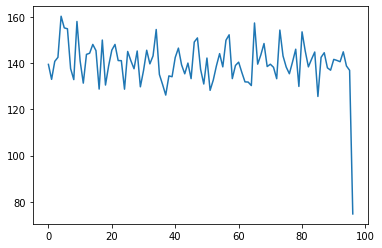

In [42]:
xpoints = np.array(range(data.shape[0]))
ypoints = np.array(data['Reward'])

plt.plot(xpoints, ypoints)
plt.show()